In [439]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [440]:
df= pd.read_csv('data/data.csv')

In [441]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

Converts them to numeric (non-convertible values become NaN)

In [443]:
cols_to_convert = df.columns[df.dtypes == 'object'].drop('timestamp')
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df[cols_to_convert].isna().sum()

equipment_energy_consumption    912
lighting_energy                 864
zone1_temperature               949
zone1_humidity                  888
zone2_temperature               923
dtype: int64

drop the all the duplicate row


In [444]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

 convert the timestamp column to datetime and derive new time-based features:

hour, day, month, and weekday help the model understand temporal patterns in energy use.

In [445]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday
df.drop('timestamp', axis=1, inplace=True)

In [446]:
df.describe()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour,day,month,weekday
count,15880.000000,15928.000000,15845.000000,15903.000000,15871.000000,15926.000000,15991.000000,15912.000000,15978.000000,16014.000000,...,15995.000000,15967.000000,15980.000000,15966.000000,15965.000000,15966.000000,16789.000000,16789.00000,16789.000000,16789.000000
mean,95.787256,3.935337,21.248633,39.046351,19.792984,39.488571,21.666530,38.197731,20.240384,37.942745,...,78.959506,4.196572,38.445121,2.780896,24.884603,25.114924,11.507416,15.89094,2.771279,2.978021
std,182.525447,14.599022,2.163772,9.967177,2.935683,10.143412,2.595276,10.157313,2.778673,10.788318,...,28.586422,4.415527,21.259284,6.084598,26.177152,25.507229,6.933490,8.81507,1.180053,1.981612
min,-1139.985693,-86.002966,8.726818,-46.660000,2.988199,-77.265503,6.543921,-71.406273,4.613485,-81.446225,...,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590,0.000000,1.00000,1.000000,0.000000
25%,50.000000,0.000000,20.500000,37.025833,18.600000,37.745000,20.533333,36.590000,19.266875,35.193333,...,71.000000,2.000000,29.000000,0.450000,12.202974,12.212968,5.000000,8.00000,2.000000,1.000000
50%,60.000000,0.000000,21.323333,39.230000,19.600000,40.295833,21.767500,38.400000,20.290000,38.090000,...,84.166667,4.000000,40.000000,2.750000,24.874799,24.838493,12.000000,16.00000,3.000000,3.000000
75%,100.000000,0.000000,22.100000,42.500000,20.790000,43.000000,22.760000,41.433333,21.356667,41.566667,...,91.976190,6.000000,40.000000,5.300000,37.957598,37.977074,18.000000,23.00000,4.000000,5.000000
max,1139.985693,86.002966,33.746609,76.292756,36.552882,77.265503,36.823982,71.406273,35.921144,81.446225,...,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617,23.000000,31.00000,12.000000,6.000000


The total number of missing values per column

Their proportion as a percentage of total rows

In [447]:
df_null = pd.DataFrame(df.isnull().sum(),columns=['no_null'])
null_percentage=pd.DataFrame(df.isnull().mean() * 100,columns=['null_percentage'])
concated= pd.concat([df_null,null_percentage],axis=1)
concated

,no_null,null_percentage
equipment_energy_consumption,909,5.414259
lighting_energy,861,5.128358
zone1_temperature,944,5.622729
zone1_humidity,886,5.277265
zone2_temperature,918,5.467866
zone2_humidity,863,5.140270
zone3_temperature,798,4.753112
zone3_humidity,877,5.223658
zone4_temperature,811,4.830544
zone4_humidity,775,4.616118


his replaces missing values with the median of each column. Median imputation is robust against outliers and skewed distributions.

In [448]:
df.fillna(df.median(), inplace=True)

try to find the negative value, some of the feature can't be negative like energy consumption


In [449]:
neg_cols = df.select_dtypes(include=['float64', 'int64']).columns
neg_cols_with_negatives = df[neg_cols].columns[(df[neg_cols] < 0).any()].tolist()
print(neg_cols_with_negatives)
print(len(neg_cols_with_negatives))


can_neg_val =['zone6_temperature','visibility_index','wind_speed', 'visibility_index', 'random_variable1', 'random_variable2','dew_point','outdoor_temperature']
for col in neg_cols_with_negatives:
  if col not in can_neg_val:
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)


['equipment_energy_consumption', 'lighting_energy', 'zone1_humidity', 'zone2_humidity', 'zone3_humidity', 'zone4_humidity', 'zone5_humidity', 'zone6_temperature', 'zone6_humidity', 'zone7_humidity', 'zone8_humidity', 'zone9_humidity', 'outdoor_temperature', 'outdoor_humidity', 'wind_speed', 'visibility_index', 'dew_point', 'random_variable1', 'random_variable2']
19


This heatmap helps visually assess where missing values appear in the dataset. Each column is represented along the x-axis, and missing entries are shown in a contrasting color (usually yellow on dark purple using 'viridis' colormap). This plot is useful for spotting.

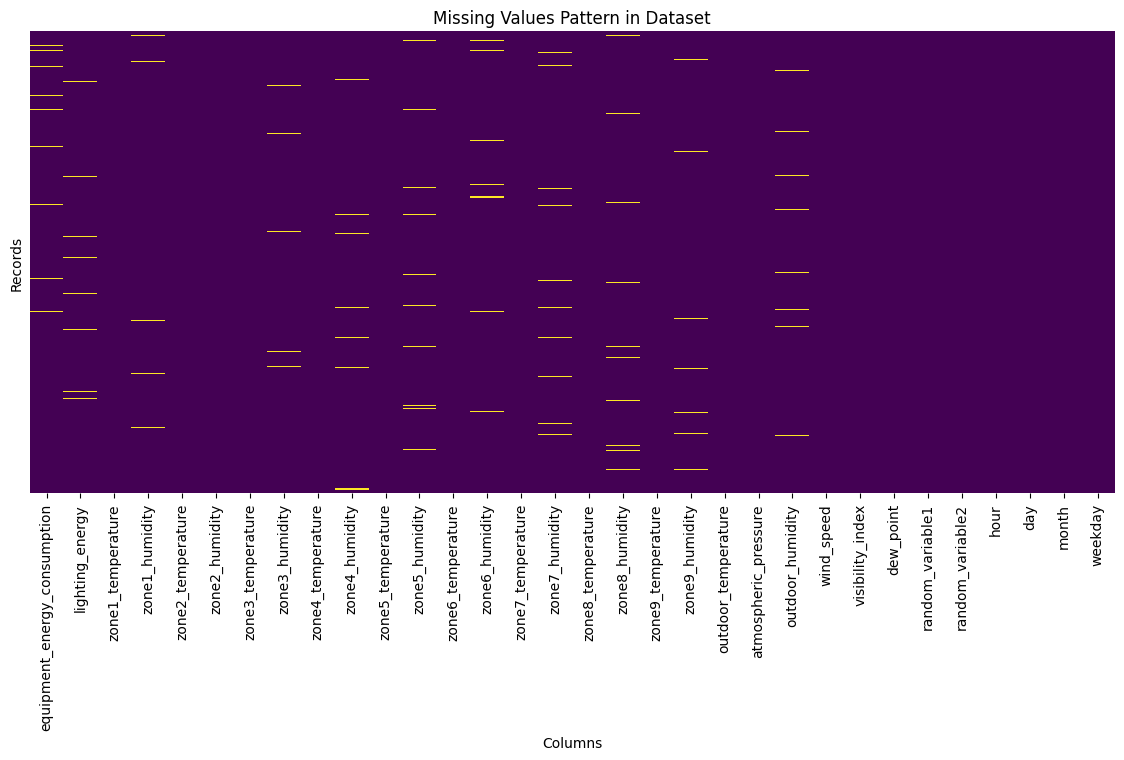

In [450]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Pattern in Dataset')
plt.xlabel('Columns')
plt.ylabel('Records')
plt.show()

Which features are normally distributed
Which ones are skewed or contain outliers and how scaling or transformation might help later in preprocessing

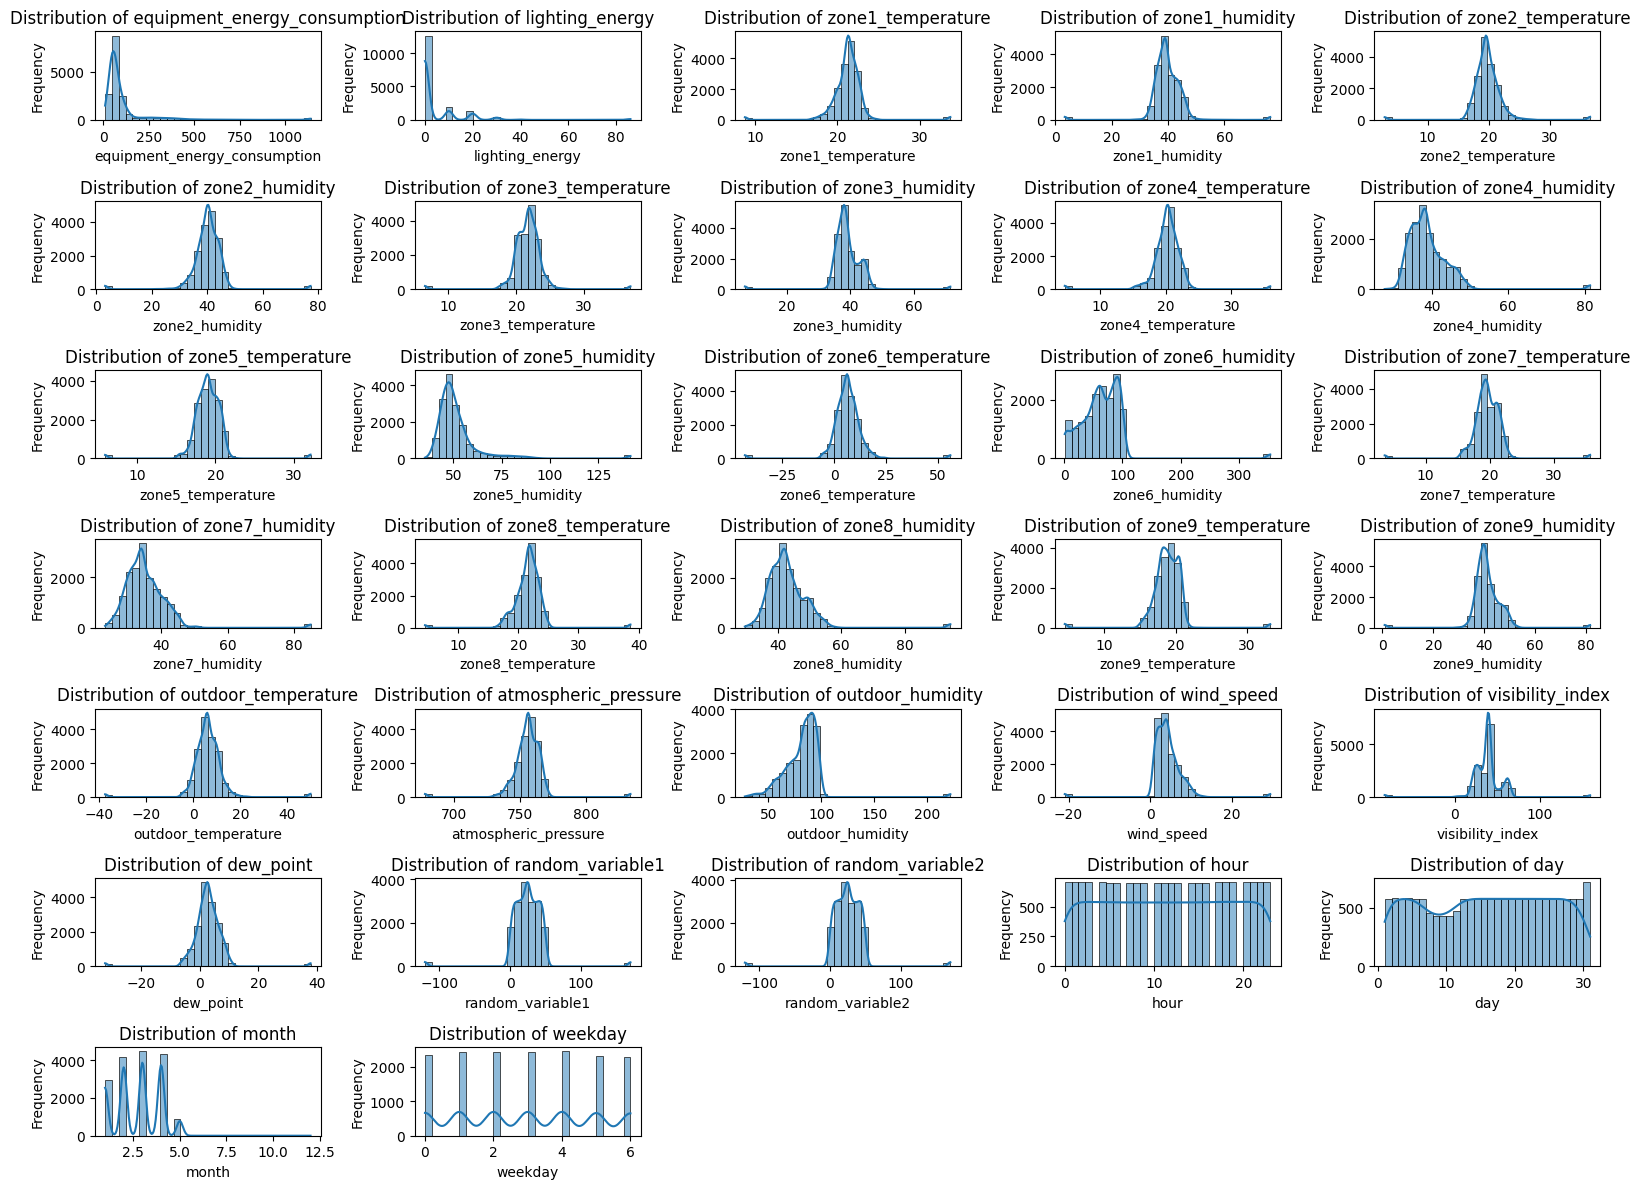

In [451]:
cols_to_plot = df.columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(cols_to_plot):
    plt.subplot(7, 5, i + 1) 
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [452]:
null_columns = df.columns[df.isnull().any()]
skew_values=df[null_columns].skew(numeric_only=True)
symmetric_columns=skew_values[skew_values.between(-0.5, 0.5)].index.tolist()
skewed_columns=[col for col in null_columns if col not in symmetric_columns]


To choose between mean (for symmetric) or median (for skewed) imputation methods.

In [453]:
skew_values

equipment_energy_consumption    4.714002
lighting_energy                 4.275555
zone1_humidity                  0.011989
zone2_humidity                 -0.130321
zone3_humidity                  0.014809
zone4_humidity                  3.758183
zone5_humidity                  4.217988
zone6_humidity                  3.371191
zone7_humidity                  3.559468
zone8_humidity                  3.670323
zone9_humidity                  0.053478
outdoor_humidity                2.916803
dtype: float64

Fill missing values with mean or median based on distribution skewness.

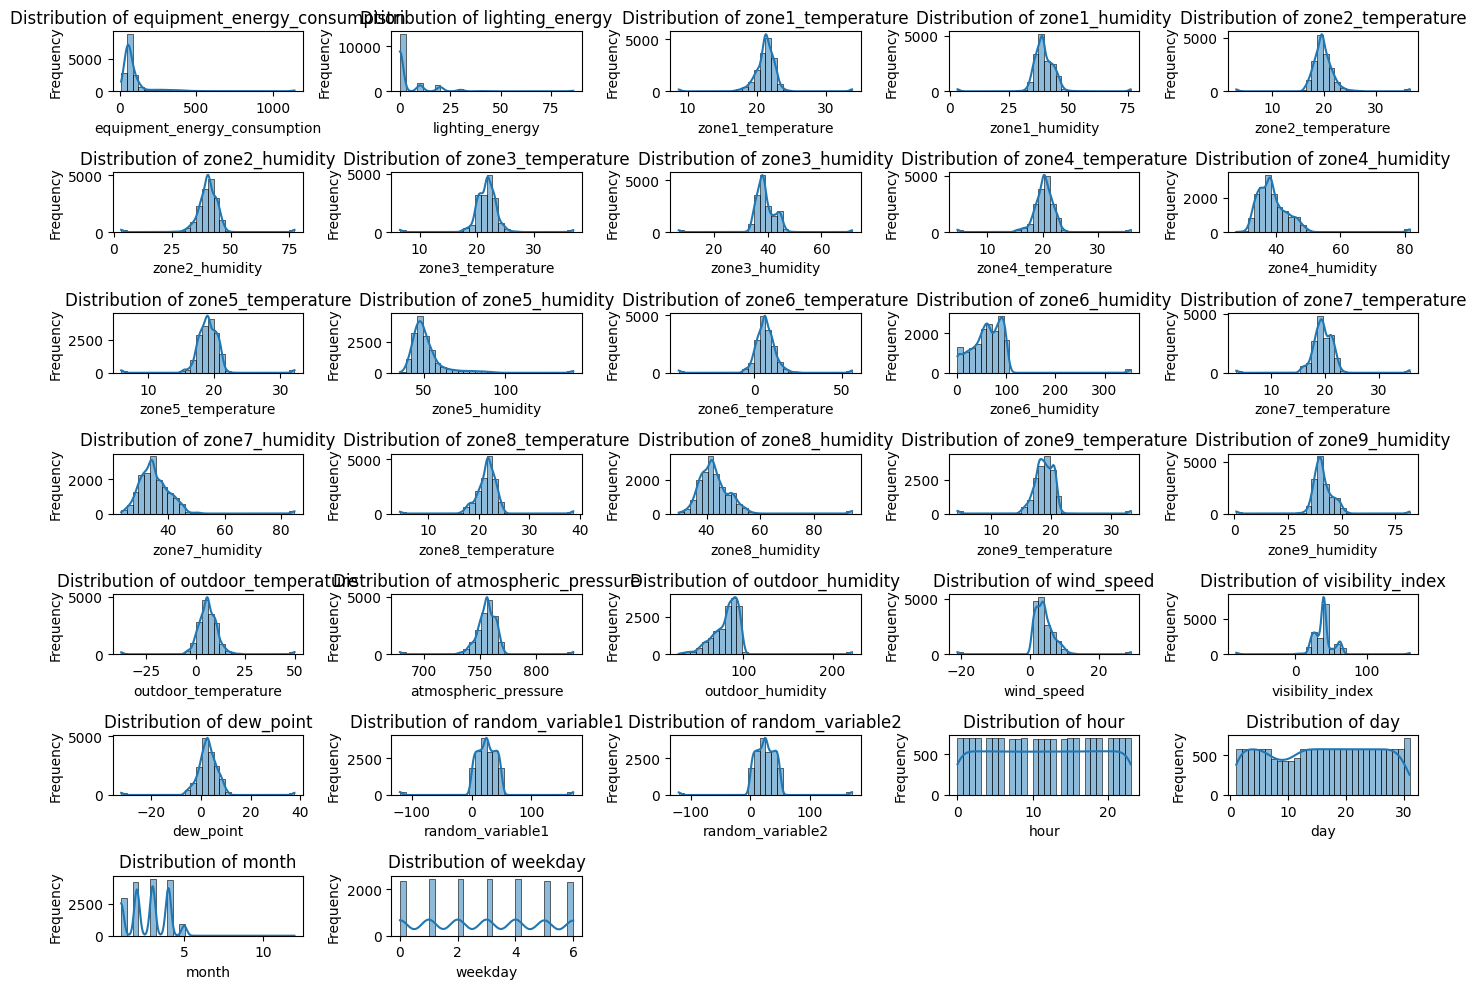

In [454]:
cols_to_plot = df.columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(cols_to_plot):
    plt.subplot(7, 5, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

 Extract time features (hour, day, month, weekday) for temporal analysis. 

In [455]:
df.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour,day,month,weekday
0,60.0,NaN,33.746609,47.596667,19.2,44.790000,19.79,38.400000,19.000000,45.566667,...,92.0,7.000000,63.000000,5.300000,13.275433,13.275433,17,11,1,0
1,60.0,30.0,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,92.0,6.666667,59.166667,5.200000,18.606195,18.606195,17,11,1,0
2,50.0,30.0,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,45.890000,...,92.0,6.333333,55.333333,5.100000,28.642668,28.642668,17,11,1,0
3,50.0,40.0,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.290000,45.723333,...,92.0,6.000000,51.500000,37.673716,45.410389,45.410389,17,11,1,0
4,60.0,40.0,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,92.0,5.666667,47.666667,4.900000,10.084097,10.084097,17,11,1,0


Calculating the average temperature across all 9 zones into a new feature: zone_temperature and Dropping the individual zone temperature columns to reduce dimensionality and redundancy

In [456]:

df['zone_temperature']=(df['zone1_temperature']+df['zone2_temperature']+df['zone3_temperature']+df['zone4_temperature']+df['zone5_temperature']+df['zone6_temperature']+df['zone7_temperature']+df['zone8_temperature']+df['zone9_temperature'])/9
df.drop(columns=['zone1_temperature','zone2_temperature','zone3_temperature','zone4_temperature','zone5_temperature','zone6_temperature','zone7_temperature','zone8_temperature','zone9_temperature'],inplace=True)

 Reduce dimensionality and simplify representation by averaging zone readings.

In [457]:

df['zone_humidity']=(df['zone1_humidity']+df['zone2_humidity']+df['zone3_humidity']+df['zone4_humidity']+df['zone5_humidity']+df['zone6_humidity']+df['zone7_humidity']+df['zone8_humidity']+df['zone9_humidity'])/9
df.drop(columns=['zone1_humidity','zone2_humidity','zone3_humidity','zone4_humidity','zone5_humidity','zone6_humidity','zone7_humidity','zone8_humidity','zone9_humidity'],inplace=True)

In [458]:
df.columns


Index(['equipment_energy_consumption', 'lighting_energy',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2', 'hour', 'day', 'month', 'weekday',
       'zone_temperature', 'zone_humidity'],
      dtype='object')

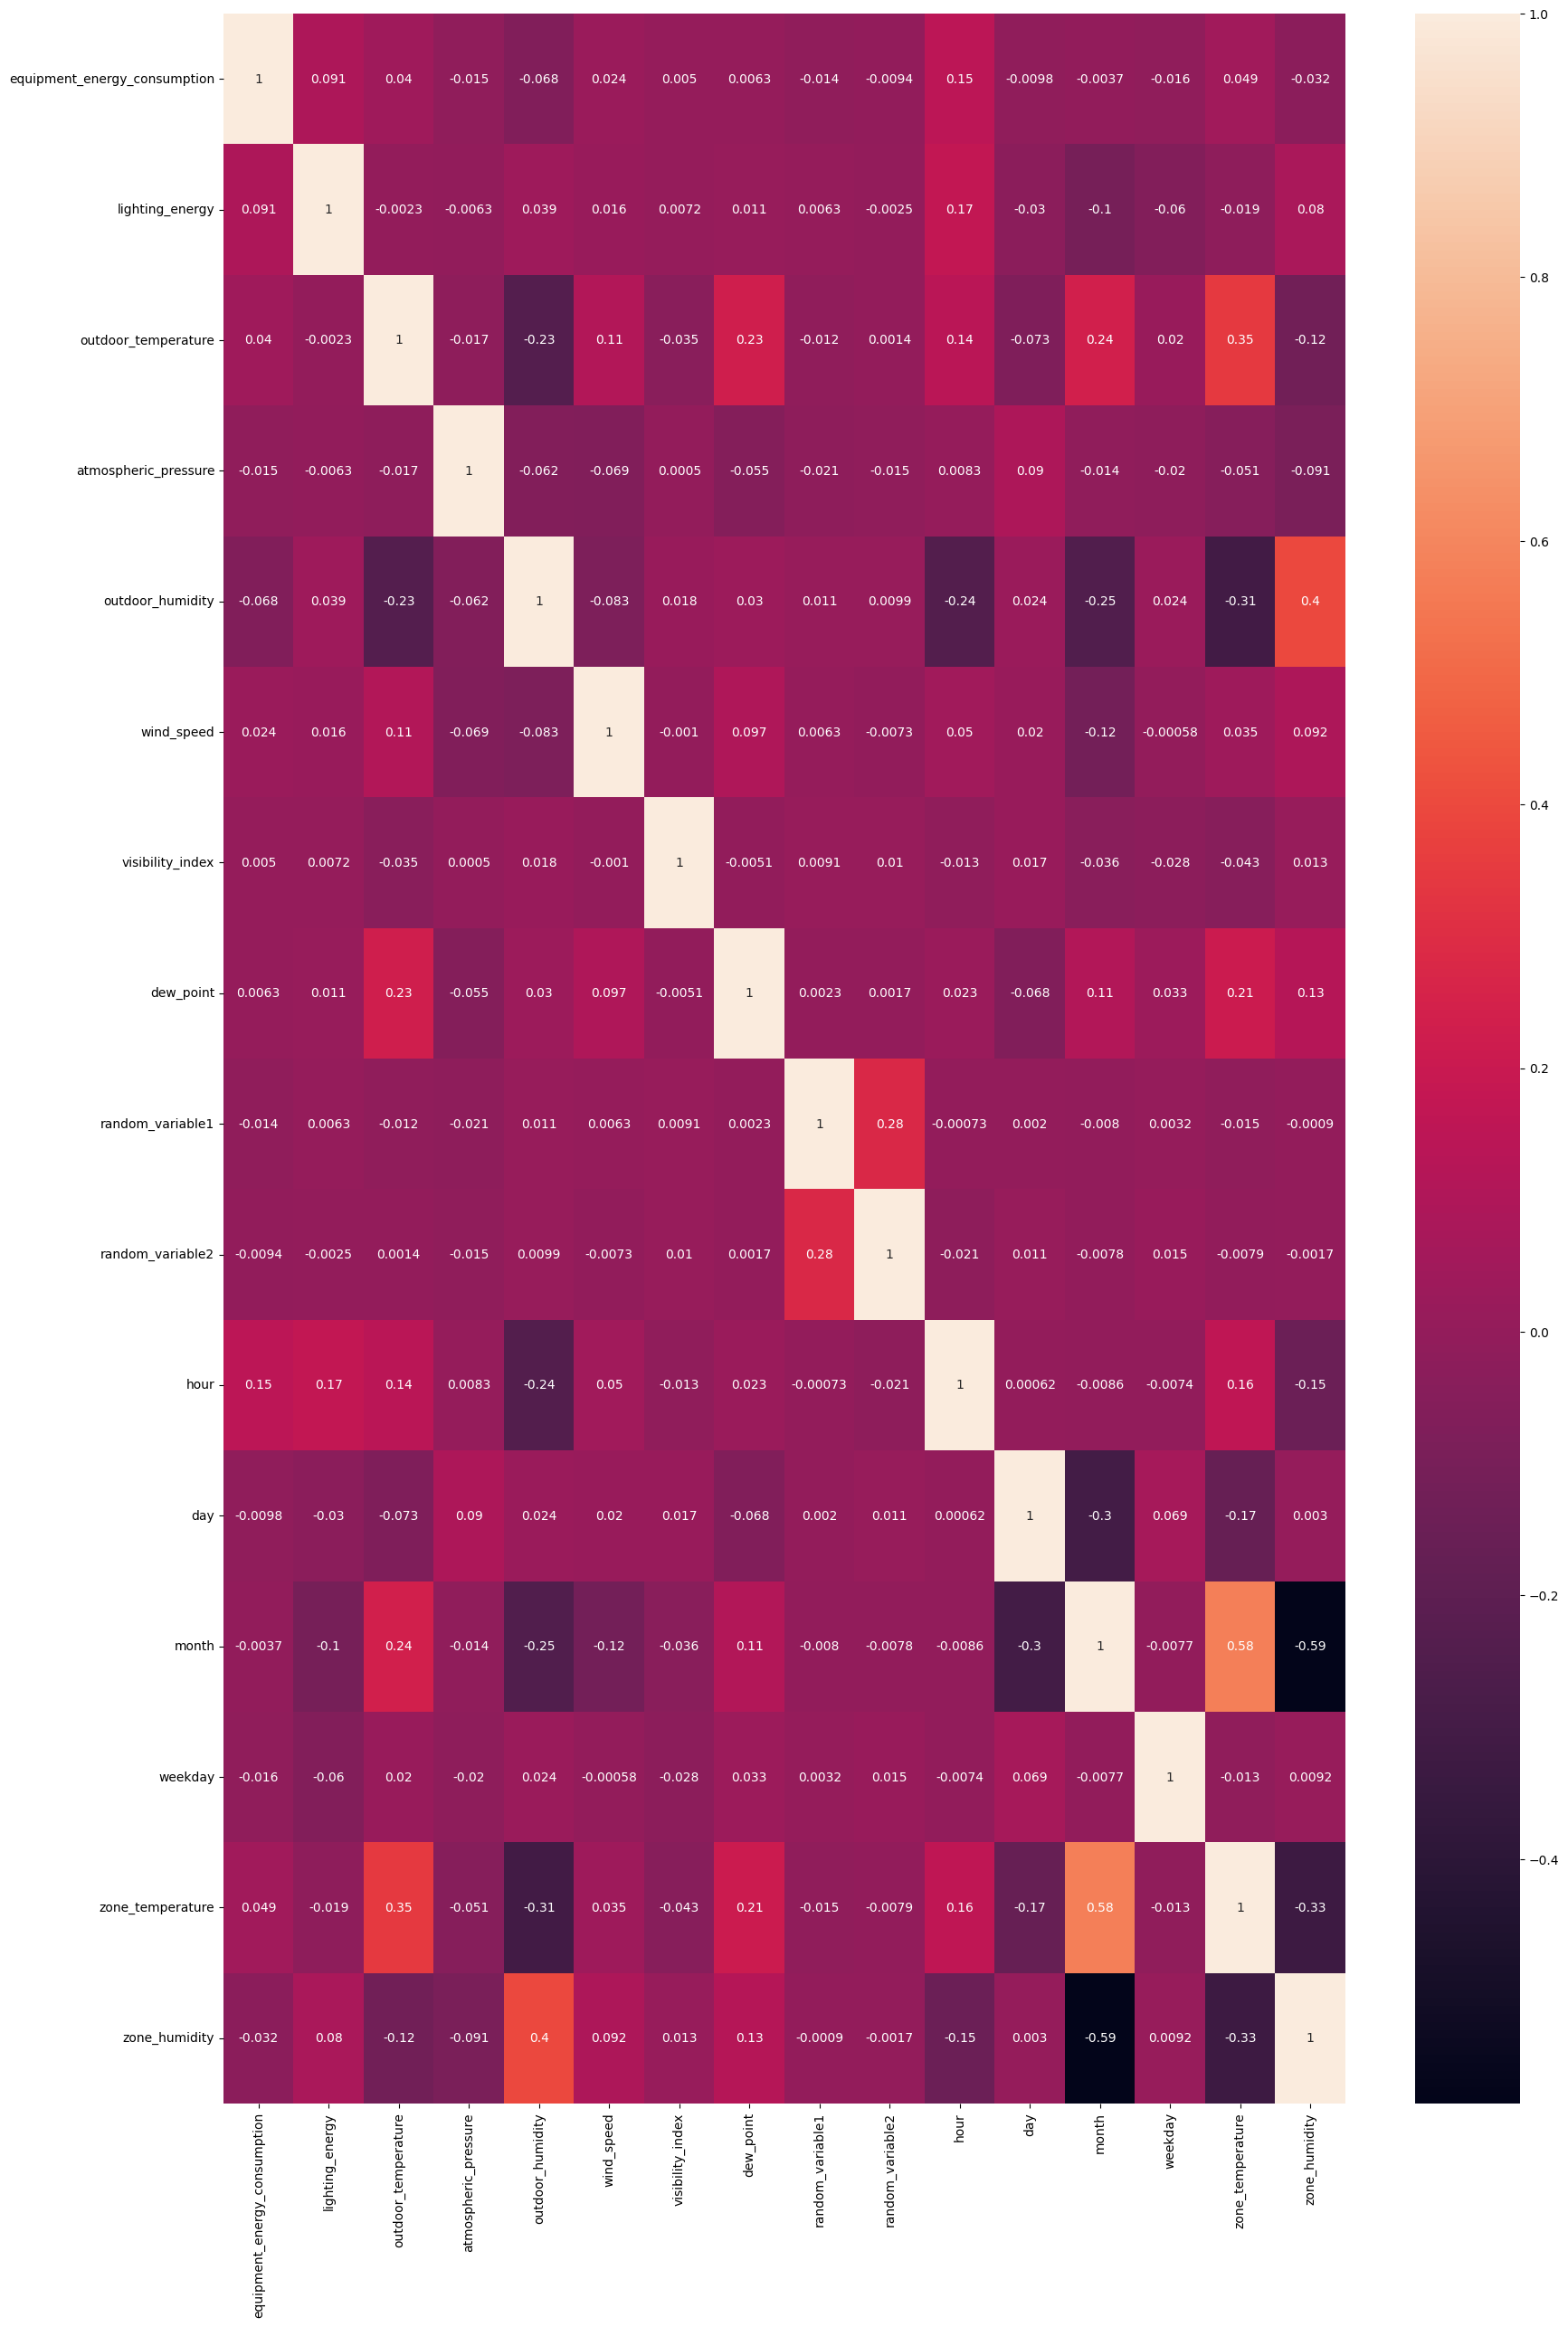

In [459]:
plt.figure(figsize=(20,30))
sns.heatmap(df.corr(), annot=True);

Identify relationships between variables for feature selection.

In [460]:

correlation_matrix=df.corr()
correlation_matrix

,equipment_energy_consumption,lighting_energy,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour,day,month,weekday,zone_temperature,zone_humidity
equipment_energy_consumption,1.000000,0.090565,0.040094,-0.015077,-0.067939,0.023651,0.005026,0.006258,-0.014220,-0.009377,0.147080,-0.009822,-0.003727,-0.015629,0.048910,-0.031856
lighting_energy,0.090565,1.000000,-0.002303,-0.006346,0.038953,0.015983,0.007222,0.010848,0.006304,-0.002468,0.171608,-0.029597,-0.102789,-0.060163,-0.018974,0.080339
outdoor_temperature,0.040094,-0.002303,1.000000,-0.016938,-0.234987,0.108779,-0.035085,0.228550,-0.011844,0.001433,0.144056,-0.073035,0.235066,0.020281,0.348011,-0.121980
atmospheric_pressure,-0.015077,-0.006346,-0.016938,1.000000,-0.062006,-0.068610,0.000504,-0.054815,-0.021106,-0.014623,0.008273,0.089657,-0.014021,-0.020233,-0.051168,-0.091324
outdoor_humidity,-0.067939,0.038953,-0.234987,-0.062006,1.000000,-0.083498,0.017579,0.029960,0.010859,0.009873,-0.240648,0.023670,-0.249220,0.024357,-0.307033,0.396275
wind_speed,0.023651,0.015983,0.108779,-0.068610,-0.083498,1.000000,-0.001028,0.097075,0.006294,-0.007328,0.049689,0.019817,-0.120938,-0.000575,0.035325,0.092055
visibility_index,0.005026,0.007222,-0.035085,0.000504,0.017579,-0.001028,1.000000,-0.005068,0.009101,0.010058,-0.013044,0.017029,-0.036470,-0.028142,-0.042827,0.012952
dew_point,0.006258,0.010848,0.228550,-0.054815,0.029960,0.097075,-0.005068,1.000000,0.002341,0.001687,0.023016,-0.068094,0.111142,0.032521,0.207555,0.126360
random_variable1,-0.014220,0.006304,-0.011844,-0.021106,0.010859,0.006294,0.009101,0.002341,1.000000,0.280380,-0.000734,0.002005,-0.007998,0.003190,-0.014996,-0.000905
random_variable2,-0.009377,-0.002468,0.001433,-0.014623,0.009873,-0.007328,0.010058,0.001687,0.280380,1.000000,-0.021201,0.010594,-0.007825,0.015226,-0.007935,-0.001750


random_variable1: --0.030853 (equipment), -0.008732 (lighting).

random_variable2: -0.020403 (equipment), -0.020403 (lighting). Negligible correlations with both targets:

visibility_index :0.0047 (equipment), 0.0071 (lighting). Weak correlation with targets:

atmospheric_pressure:-0.015 (equipment), -0.006 (lighting).

day: -0.009 (equipment), -0.029 (lighting).

weekday: -0.015 (equipment), -0.059 (lighting).

dew_point :Weak correlation with targets (0.006 for equipment, 0.010 for lighting) and Moderately correlated with outdoor_temperature (0.228), but temperature is already a stronger predictor.

month Overlaps with zone_temperature Weak correlation with targets (0.006 for equipment, 0.010 for lighting).

In [461]:
df.drop(columns=['outdoor_humidity', 'wind_speed', 'random_variable1', 'random_variable2',
    'visibility_index', 'atmospheric_pressure', 'day', 'weekday', 'dew_point', 'month'
],inplace=True)

In [462]:

len(df.columns)

6

Visualize distribution and detect outliers.

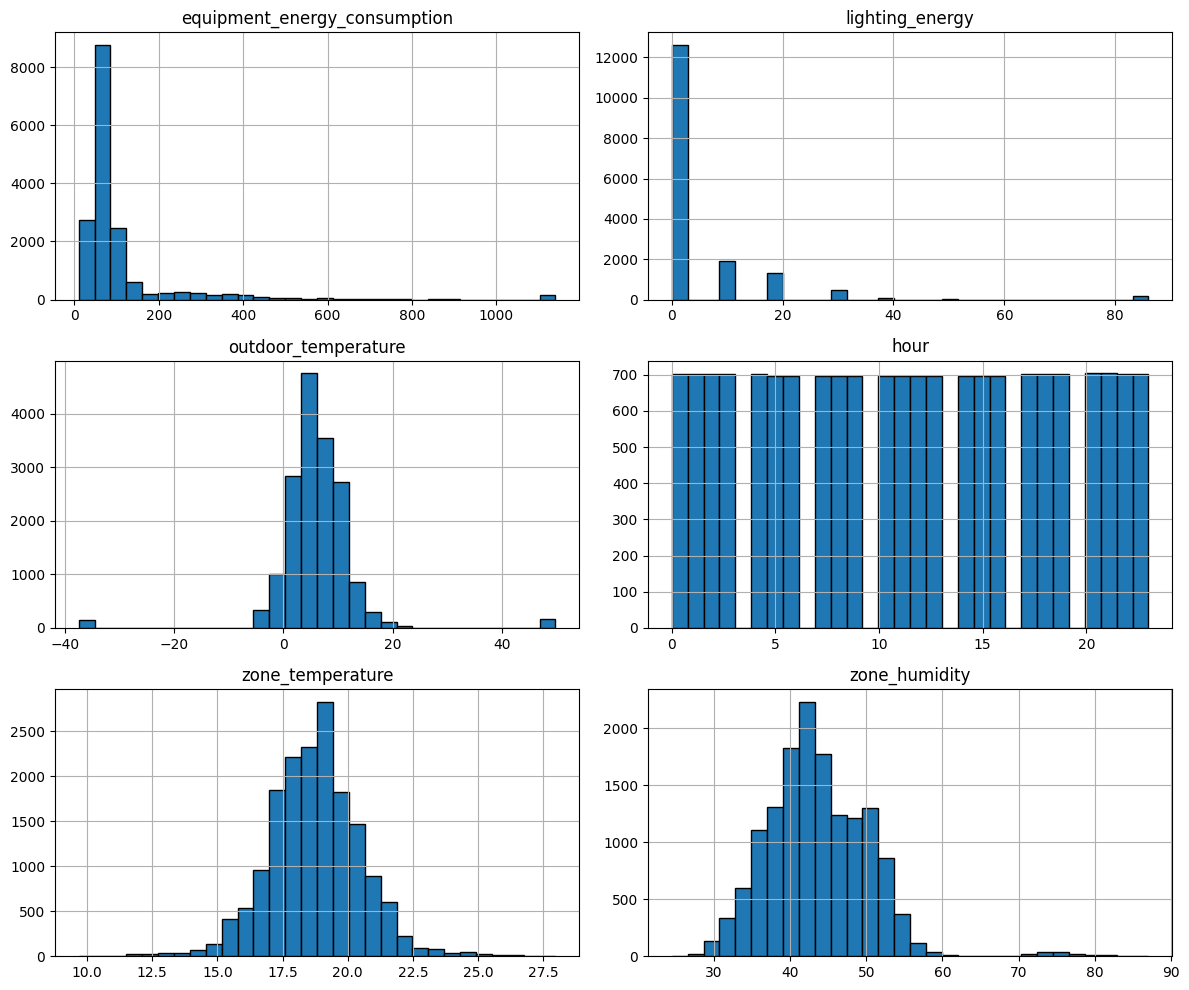

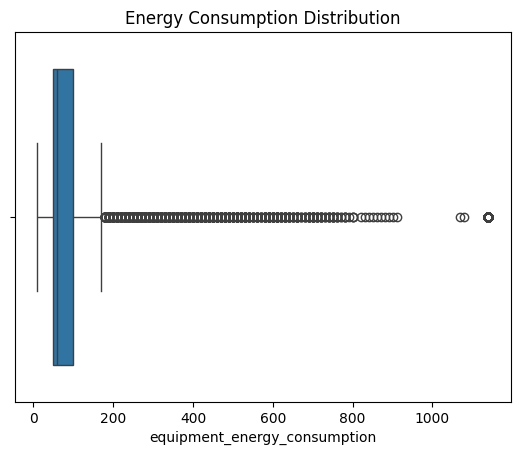

In [463]:
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()
sns.boxplot(x=df['equipment_energy_consumption'])
plt.title('Energy Consumption Distribution')
plt.show()

 Analyze how different features correlate with energy consumption.

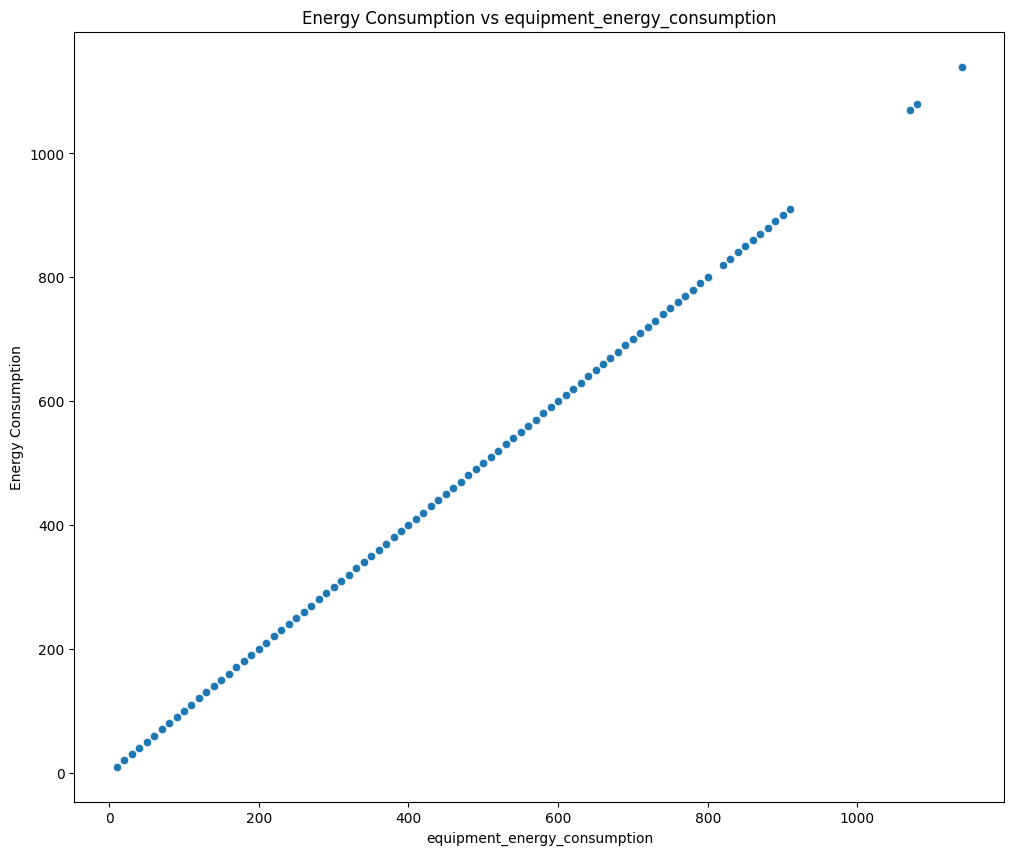

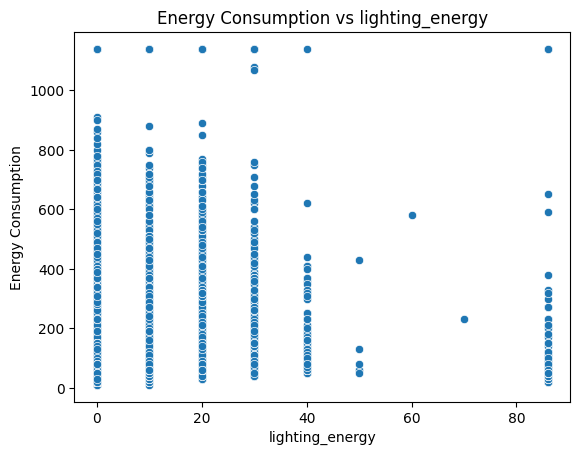

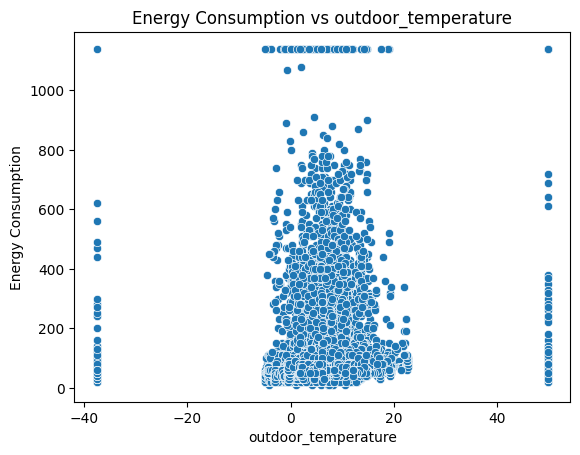

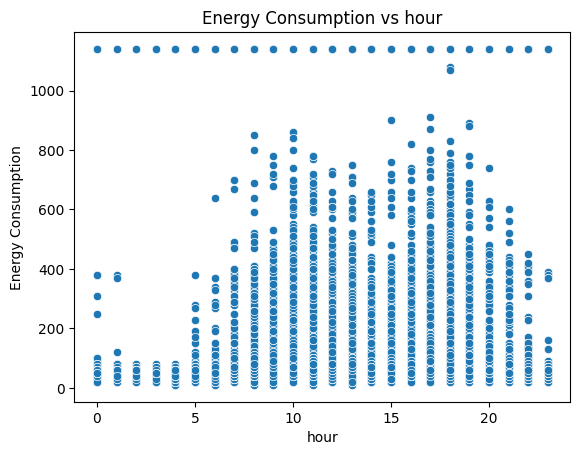

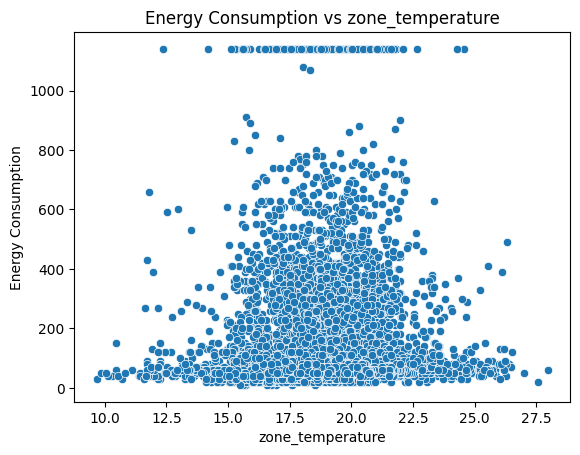

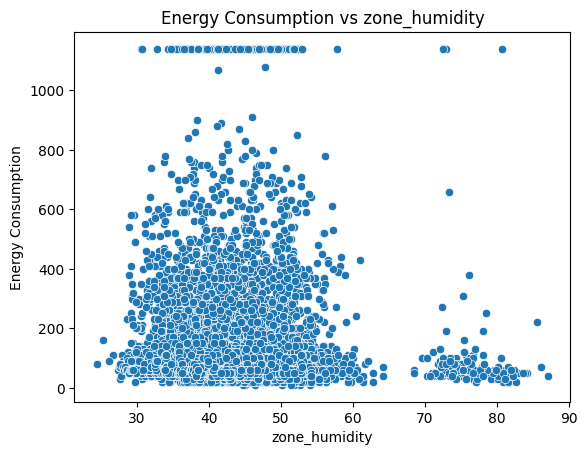

In [464]:
plt.figure(figsize=(12,10))
for feature in df.columns:
 
    sns.scatterplot(x=df[feature], y=df['equipment_energy_consumption'])
    plt.title(f'Energy Consumption vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Energy Consumption')
    plt.show()

 Detect outliers in all variables visually.

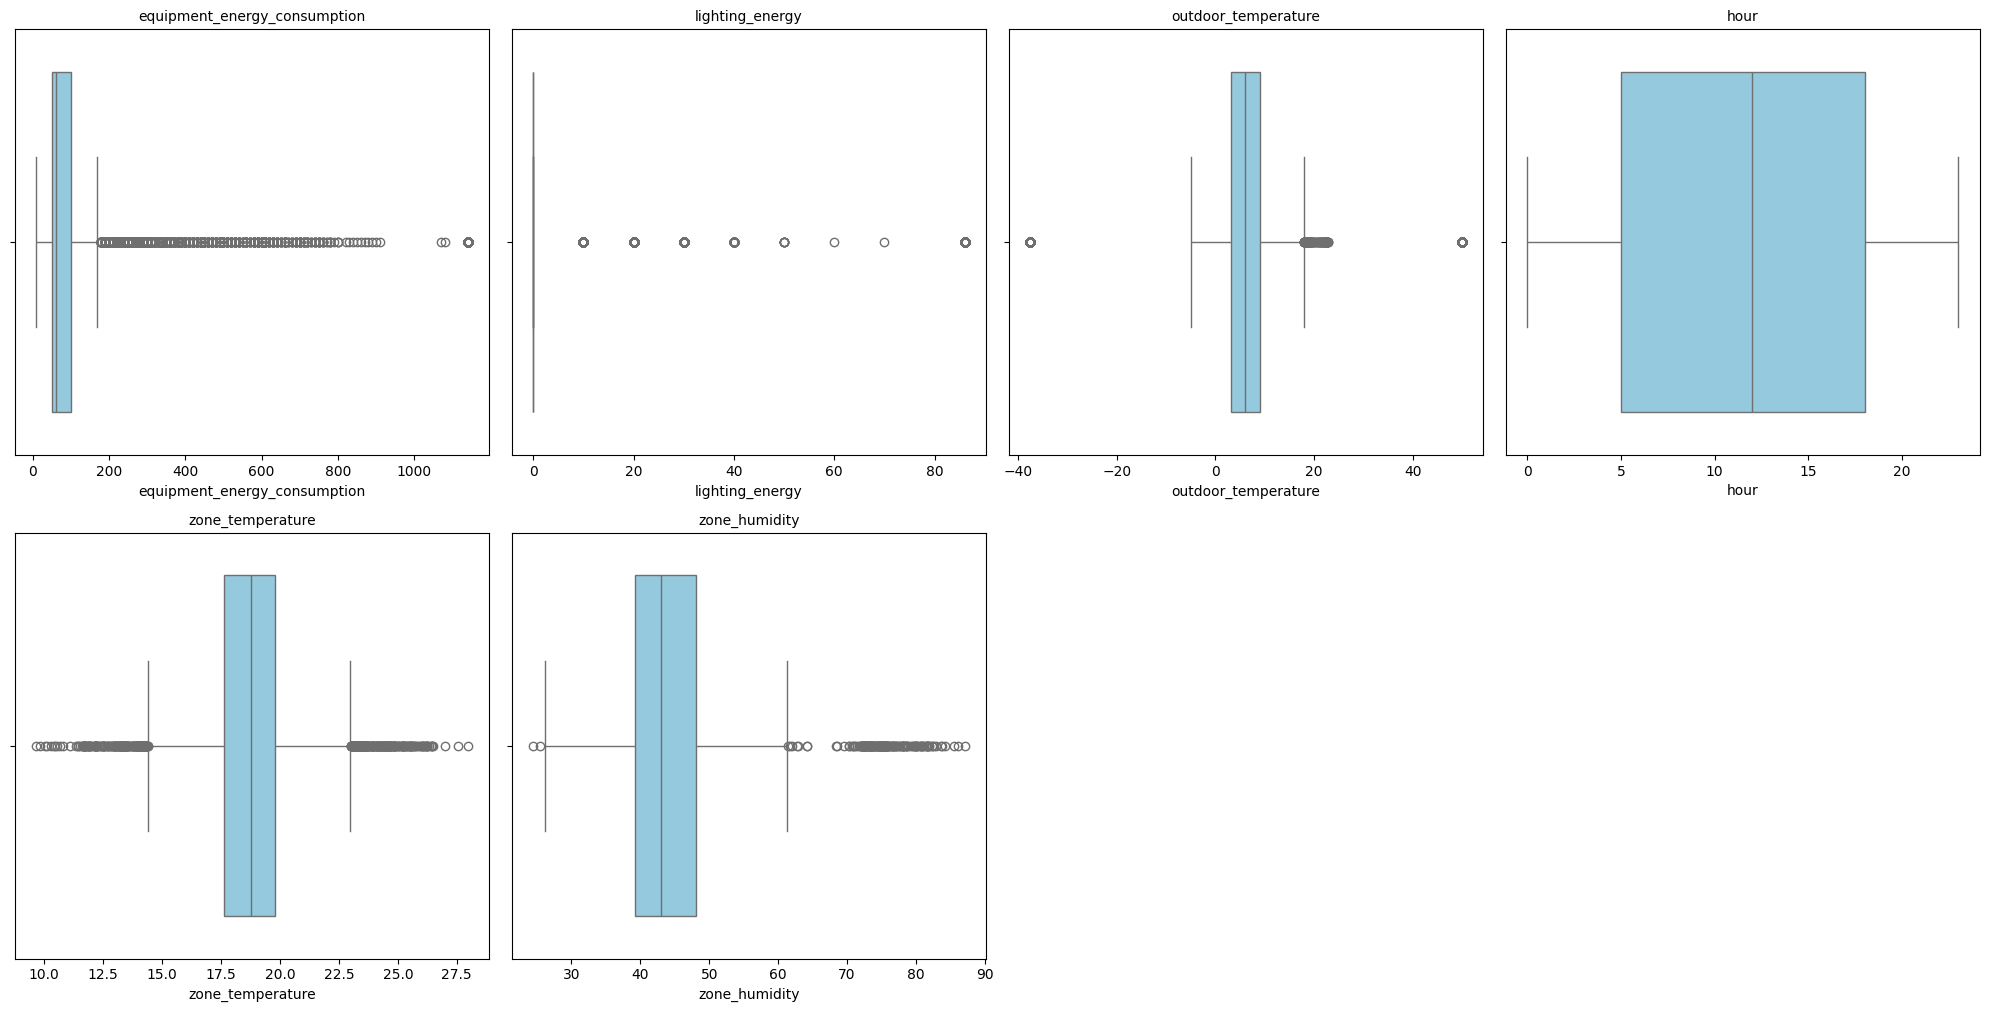

In [465]:
plt.figure(figsize=(20, 40))
for i, column in enumerate(df.columns):
    plt.subplot(8, 4, i + 1)
    sns.boxplot(data=df[column], orient='h', color="skyblue")
    plt.title(column, fontsize=10)
    plt.tight_layout()

plt.show()

 Remove extreme values that distort statistical models.

In [466]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [467]:
df.columns

Index(['equipment_energy_consumption', 'lighting_energy',
       'outdoor_temperature', 'hour', 'zone_temperature', 'zone_humidity'],
      dtype='object')

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16789 entries, 0 to 16856
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   equipment_energy_consumption  16476 non-null  float64
 1   lighting_energy               16560 non-null  float64
 2   outdoor_temperature           16789 non-null  float64
 3   hour                          16789 non-null  int32  
 4   zone_temperature              16789 non-null  float64
 5   zone_humidity                 14655 non-null  float64
dtypes: float64(5), int32(1)
memory usage: 852.6 KB


In [469]:
for col in df.columns:
    df=remove_outliers_iqr(df, col)


Visualize relationships and correlations between important variables.

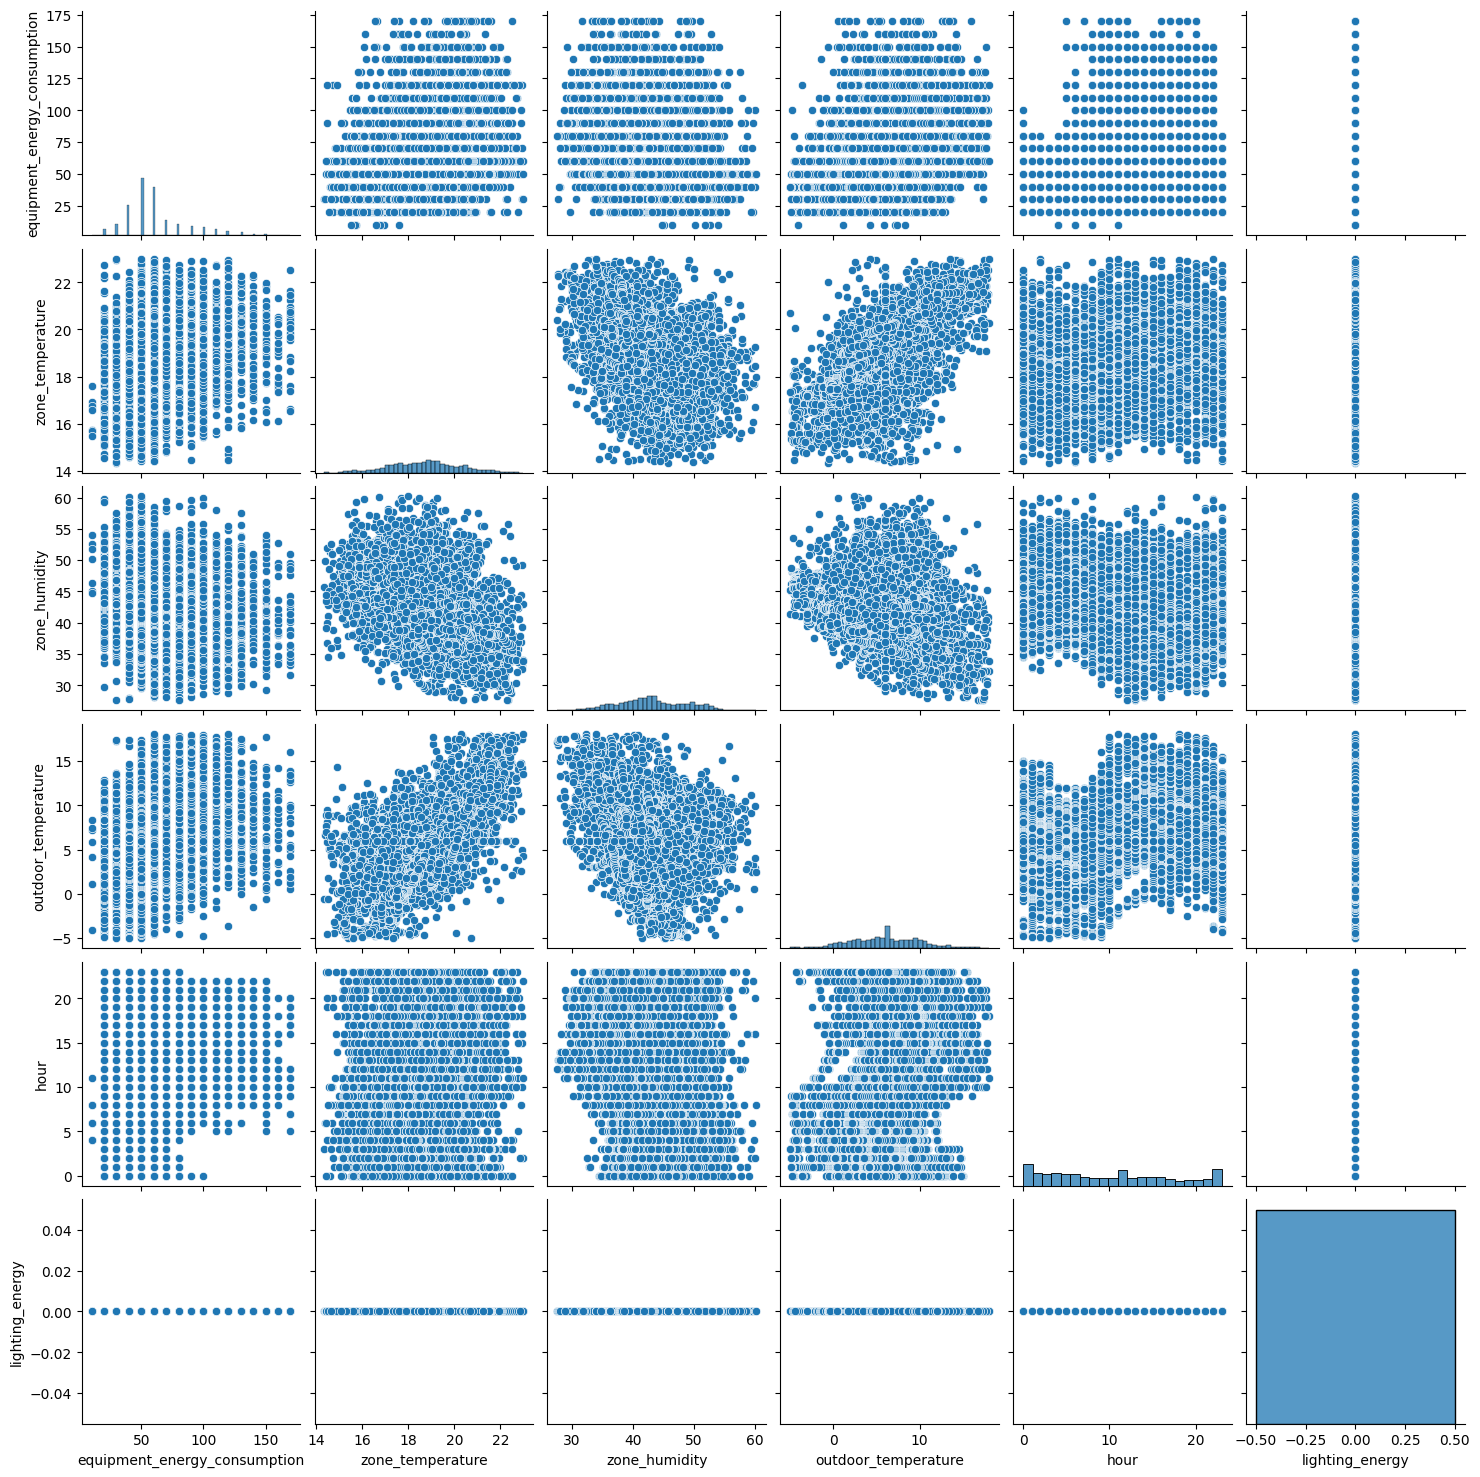

In [470]:
# Pair plot for selected features
sns.pairplot(df[['equipment_energy_consumption', 'zone_temperature', 'zone_humidity', 'outdoor_temperature','hour','lighting_energy']])
plt.show()

In [471]:
#Drop Constant Columns
df.drop(columns=['lighting_energy'],inplace=True)

In [472]:
df.describe()

,equipment_energy_consumption,outdoor_temperature,hour,zone_temperature,zone_humidity
count,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000
mean,61.566147,6.033639,10.173847,18.697991,43.099950
std,25.517998,4.134004,6.967192,1.551219,5.695854
min,10.000000,-4.988889,0.000000,14.347159,27.612698
25%,50.000000,3.133333,4.000000,17.609259,39.190370
50%,60.000000,6.000000,9.000000,18.749630,42.740062
75%,70.000000,8.933333,16.000000,19.738743,47.400155
max,170.000000,18.033333,23.000000,22.998746,60.165214


export the final data_set for more feature engineering and transformation


In [473]:
final_data= df.to_csv("data/final_data.csv",index=False)